# Análisis de Factores

French Food Data: [link](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode133.html)

- Martínez Ostoa Néstor Iván

## Bibliotecas requeridas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')
from sklearn.decomposition import FactorAnalysis, PCA

from FA_utils import *

import warnings
warnings.filterwarnings('ignore')

## Datos

French Food Data: [link](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode133.html)

- **Descripción:** _"The data set consists of the average expenditures on food for several different types of families in France (manual workers = MA, employees = EM, managers = CA) with different numbers of children (2,3,4 or 5 children). The data is taken from Lebart, Morineau and Fénelon (1982)"_

- **Tipos de familias:**:
    - **MA**: trabajadores manuales
    - **EM**: empleados
    - **CA**: jefes

In [2]:
data = pd.read_csv("food.dat", sep = "\s+")
data

,Family,Bread,Vegetables,Fruits,Meat,Poultry,Milk,Wine
0,MA2,332,428,354,1437,526,247,427
1,EM2,293,559,388,1527,567,239,258
2,CA2,372,767,562,1948,927,235,433
3,MA3,406,563,341,1507,544,324,407
4,EM3,386,608,396,1501,558,319,363
5,CA3,438,843,689,2345,1148,243,341
6,MA4,534,660,367,1620,638,414,407
7,EM4,460,699,484,1856,762,400,416
8,CA4,385,789,621,2366,1149,304,282
9,MA5,655,776,423,1848,759,495,486


## Análisis exploratorio

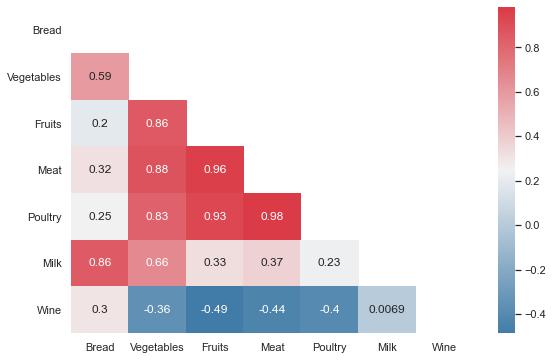

In [3]:
X = data.iloc[:, 1:]
corr_ = X.corr()
f, ax = plt.subplots(figsize=(9,6))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr_, dtype=bool))
sns.heatmap(corr_, annot=True , ax=ax, cmap=cmap, mask=mask)
plt.show()

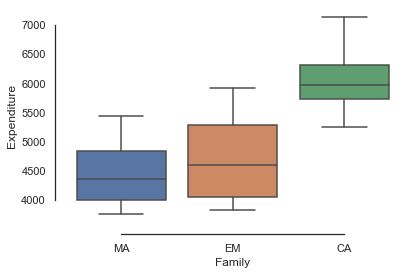

In [43]:
data = pd.read_csv("food.dat", sep = "\s+")
fam = []
expenditure = []
for idx, row in data.iterrows():
    expenditure.append(np.sum(data.iloc[idx, 1:].values))
    family = row["Family"]
    if   "MA" in family: fam.append("MA")
    elif "EM" in family: fam.append("EM")  
    else:                fam.append("CA")

family_expenditure_df = pd.DataFrame({'Family': fam, 'Expenditure': expenditure})
sns.boxplot(x="Family", y="Expenditure", data=family_expenditure_df)
sns.despine(offset=10, trim=True)
plt.savefig('imgs/boxplot.png', dpi=150, bbox_inches='tight')
plt.show()

## PCA

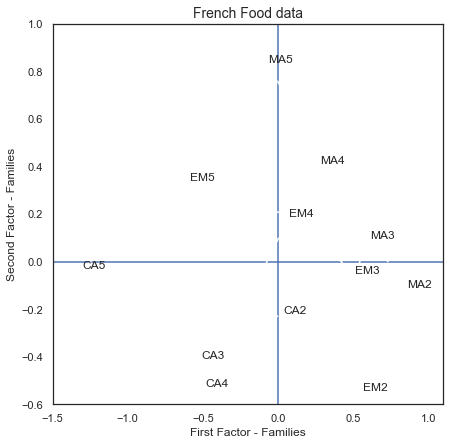

In [5]:
plot_factor_families()

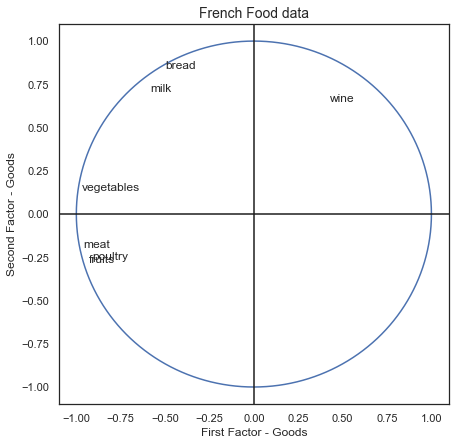

In [6]:
plot_factor_foods()

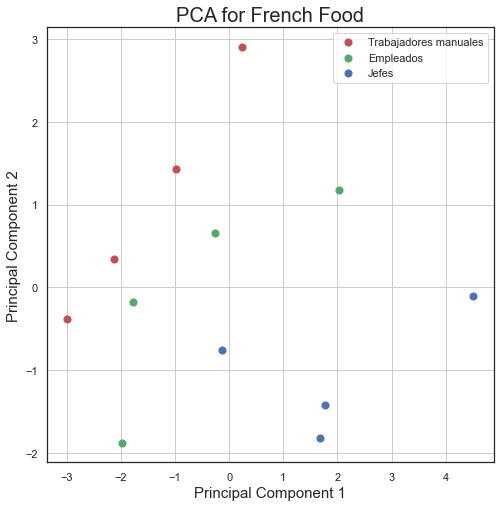

In [40]:
d = pd.read_csv("food.dat", sep = "\s+")
x = d.iloc[:, 1:]
y = d.iloc[:, 0]
x = x.apply(lambda x: (x - np.mean(x)) / np.std(x))

pca = PCA(n_components=2).fit(x)
pca_df = pd.DataFrame(data=pca.transform(x), columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y], axis=1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('PCA for French Food', fontsize = 20)

indicesToKeep = pca_df['Family'].isin(['MA2', 'MA3', 'MA4', 'MA5'])
ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], pca_df.loc[indicesToKeep, 'PC2'], c = 'r', s=50)

indicesToKeep = pca_df['Family'].isin(['EM2', 'EM3', 'EM4', 'EM5'])
ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], pca_df.loc[indicesToKeep, 'PC2'],c = 'g', s=50)

indicesToKeep = pca_df['Family'].isin(['CA2', 'CA3', 'CA4', 'CA5'])
ax.scatter(pca_df.loc[indicesToKeep, 'PC1'], pca_df.loc[indicesToKeep, 'PC2'],c = 'b', s=50)

ax.legend(['Trabajadores manuales', 'Empleados', 'Jefes'])
ax.grid()

plt.savefig('imgs/pca.png', dpi=150)

In [8]:
pca.explained_variance_ratio_

array([0.6190339 , 0.26147002])

## Análisis de Factores

### Datos

In [9]:
data = pd.read_csv("food.dat", sep = "\s+")
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

X = X.apply(lambda x: (x-np.mean(x))/np.std(x))
X

,Bread,Vegetables,Fruits,Meat,Poultry,Milk,Wine
0,-1.117761,-1.678389,-0.955310,-1.186982,-1.160003,-0.992058,0.849995
1,-1.497930,-0.955136,-0.740207,-0.949454,-0.988409,-1.063397,-1.609050
2,-0.727845,0.193236,0.360614,0.161651,0.518270,-1.099066,0.937299
3,-0.396415,-0.933052,-1.037556,-1.002238,-1.084669,-0.305420,0.558984
4,-0.591374,-0.684606,-0.689595,-1.018073,-1.026076,-0.350007,-0.081241
5,-0.084482,0.612833,1.164087,1.209415,1.443203,-1.027727,-0.401353
6,0.851318,-0.397513,-0.873065,-0.704008,-0.691259,0.497144,0.558984
7,0.129972,-0.182194,-0.132858,-0.081156,-0.172292,0.372300,0.689939
8,-0.601122,0.314698,0.733881,1.264838,1.447388,-0.483768,-1.259836
9,2.030816,0.242925,-0.518778,-0.102269,-0.184847,1.219451,1.708479


### Matriz de correlaciones

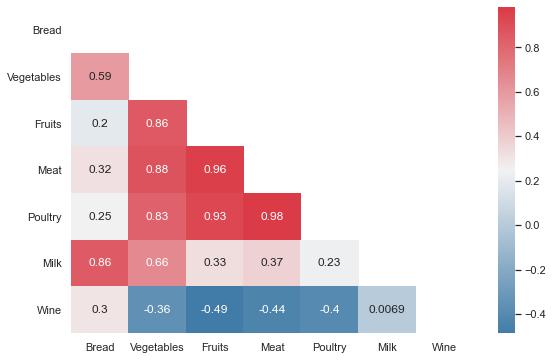

In [10]:
R = X.corr()
f, ax = plt.subplots(figsize=(9,6))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
mask = np.triu(np.ones_like(R, dtype=bool))
sns.heatmap(R, annot=True , ax=ax, cmap=cmap, mask=mask)
plt.savefig('imgs/food_corr_data.png', dpi=400, bbox_inches='tight')
plt.show()

In [11]:
R

,Bread,Vegetables,Fruits,Meat,Poultry,Milk,Wine
Bread,1.000000,0.593110,0.196139,0.321269,0.248008,0.855575,0.303761
Vegetables,0.593110,1.000000,0.856250,0.881081,0.826777,0.662799,-0.356468
Fruits,0.196139,0.856250,1.000000,0.959477,0.925542,0.332189,-0.486281
Meat,0.321269,0.881081,0.959477,1.000000,0.981785,0.374591,-0.437235
Poultry,0.248008,0.826777,0.925542,0.981785,1.000000,0.232892,-0.400157
Milk,0.855575,0.662799,0.332189,0.374591,0.232892,1.000000,0.006880
Wine,0.303761,-0.356468,-0.486281,-0.437235,-0.400157,0.006880,1.000000


### Grados de libertad

In [12]:
def d(p, k):
    unconstrained = (p-k)*(p-k)
    constrained = (p+k)
    return 0.5*unconstrained - 0.5*constrained

In [13]:
p = X.shape[1]
print(f"p={p}, k=2 => {d(p, k=2)}")
print(f"p={p}, k=3 => {d(p, k=3)}")
print(f"p={p}, k=4 => {d(p, k=4)}")

p=7, k=2 => 8.0
p=7, k=3 => 3.0
p=7, k=4 => -1.0


### Eigenvalores y proporción acumulada

In [14]:
m = R.copy()
np.fill_diagonal(m.values, 0)
Psi = np.ones((X.shape[1], X.shape[1]))
np.fill_diagonal(Psi, 1 - np.abs(m).max())

ee, ev = np.linalg.eig(R - Psi)

In [15]:
ee_sorted = np.array(sorted(ee))[::-1]
ee_sorted

array([ 3.55384773,  1.87953581,  1.08624147,  0.98831934,  0.94659734,
        0.91061622, -3.36359982])

### Factores, comunalidades y varianzas específicas

In [16]:
def graph_factors(df, x_label, y_label, method, lim_offset=0.1):
    plt.figure(figsize=(5,5))
    plt.scatter(data=df, x=x_label, y=y_label, c='r')
    x_offset = 0
    y_offset = 0
    for i in range(df.shape[0]):
        plt.text(
            x=df[x_label][i]+x_offset, y=df[y_label][i]+y_offset,
            s=df['Variables'][i], fontdict=dict(color='black', size=12)
        )
    plt.xlim(np.min(df[x_label])-lim_offset, np.max(df[x_label])+lim_offset)
    plt.ylim(np.min(df[y_label])-lim_offset, np.max(df[y_label])+lim_offset)
    
    plt.vlines(x=0, ymin=np.min(df[y_label])-lim_offset, ymax=np.max(df[y_label])+lim_offset)
    plt.hlines(y=0, xmin=np.min(df[x_label])-lim_offset, xmax=np.max(df[x_label])+lim_offset)    
    
    plt.title(f"{method}: {x_label} vs. {y_label}")
    plt.xlabel(f"{x_label}")
    plt.ylabel(f"{y_label}")
    
    plt.savefig(f"imgs/{method}_{x_label}_{y_label}.png", dpi=150, bbox_inches='tight')
    
    plt.show()

#### MLM without varimax

In [17]:
def build_table_df(data, loads, com, psi, name):
    df = pd.DataFrame({
        'Load1': loads[0], 'Load2': loads[1], 'Load3': loads[2],
        "Comunalidades": com, "Varianzas especificas": psi,
    })
    df = df.apply(lambda x: np.round(x, 4))
    df['Variables'] = data.columns[1:]
    df.to_csv(f'tables/{name}.csv', index=False)
    return df

In [18]:
data = pd.read_csv("food.dat", sep = "\s+")
X = data.iloc[:, 1:]
R = X.corr()

mlm = FactorAnalysis(n_components=3).fit(R)
loads = mlm.components_
communalities = np.diag(np.dot(loads.T, loads))
psi_specific = np.diag(R) - communalities

loads_ = [loads[0], loads[1], loads[2]]
mlm_df = build_table_df(data, loads_, communalities, psi_specific, name='mlm')
mlm_df

,Load1,Load2,Load3,Comunalidades,Varianzas especificas,Variables
0,0.1135,-0.2671,0.0558,0.0873,0.9127,Bread
1,-0.3770,-0.1942,-0.0147,0.1801,0.8199,Vegetables
2,-0.5093,-0.0512,-0.0459,0.2641,0.7359,Fruits
3,-0.4902,-0.0684,-0.0127,0.2452,0.7548,Meat
4,-0.4926,-0.0172,0.0078,0.2430,0.7570,Poultry
5,0.0080,-0.3283,-0.0302,0.1087,0.8913,Milk
6,0.4901,0.0906,0.0835,0.2553,0.7447,Wine


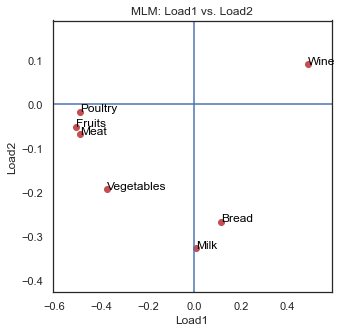

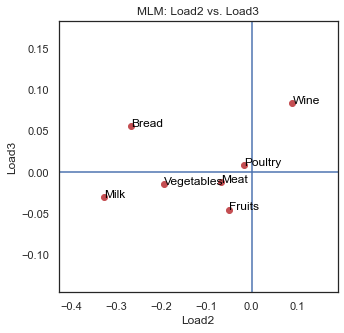

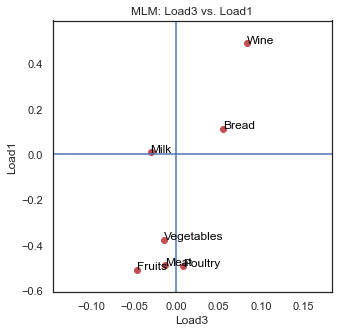

In [19]:
graph_factors(mlm_df, x_label='Load1', y_label="Load2", method="MLM")
graph_factors(mlm_df, x_label='Load2', y_label="Load3", method="MLM")
graph_factors(mlm_df, x_label='Load3', y_label="Load1", method="MLM")

#### MLM with varimax rotation

In [20]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = np.eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u,s,vh = np.linalg.svd(np.dot(Phi.T,np.asarray(Lambda)**3 - (gamma/p) * np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
        R = np.dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return np.dot(Phi, R)

In [21]:
data = pd.read_csv("food.dat", sep = "\s+")
X = data.iloc[:, 1:]
R = X.corr()

dat = R
ld = loads

load = varimax(ld.T)

vl = pd.DataFrame({"0": -load[:,2], "1": load[:,1], "2": -load[:,0]})

com = np.diag(np.dot(vl, vl.T))

psi = np.diag(dat) - com


loads_ = [-load[:,2], load[:,1], -load[:,0]]
mlm_with_varimax_df = build_table_df(data, loads_, com, psi, name='mlm with varimax')
mlm_with_varimax_df

,Load1,Load2,Load3,Comunalidades,Varianzas especificas,Variables
0,-0.0499,-0.2800,-0.0804,0.0873,0.9127,Bread
1,-0.0099,-0.1425,0.3996,0.1801,0.8199,Vegetables
2,0.0137,0.0169,0.5135,0.2641,0.7359,Fruits
3,-0.0184,-0.0028,0.4948,0.2452,0.7548,Meat
4,-0.0387,0.0482,0.4891,0.2430,0.7570,Poultry
5,0.0291,-0.3263,0.0374,0.1087,0.8913,Milk
6,-0.0523,0.0245,-0.5020,0.2553,0.7447,Wine


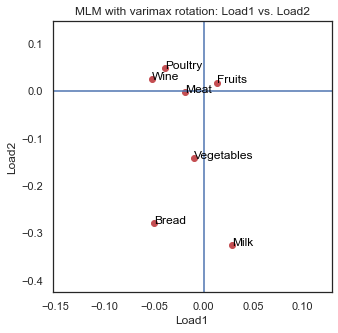

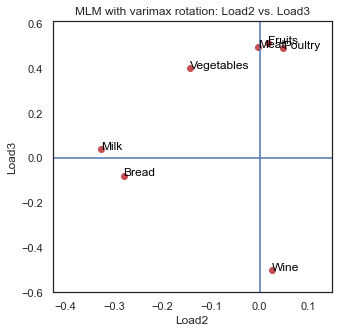

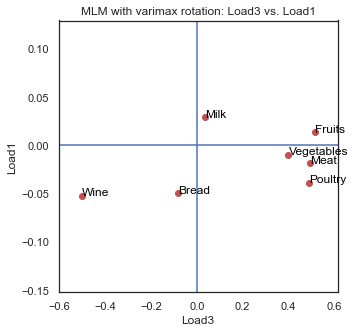

In [22]:
graph_factors(mlm_with_varimax_df, x_label='Load1', y_label="Load2", method="MLM with varimax rotation")
graph_factors(mlm_with_varimax_df, x_label='Load2', y_label="Load3", method="MLM with varimax rotation")
graph_factors(mlm_with_varimax_df, x_label='Load3', y_label="Load1", method="MLM with varimax rotation")

#### PCM after varimax rotation

In [23]:
data = pd.read_csv("food.dat", sep = "\s+")
X = data.iloc[:, 1:]
R = X.corr()

dat = R
ld = loads

e = np.linalg.eig(dat)
eigval = e[0][:3]
eigvec = e[1][:,:3].T
E = np.tile(np.array(eigval), (len(dat), 1))
Q = np.sqrt(E) * eigvec.T
load = varimax(Q)
ld = pd.DataFrame({"0": load[:,0], "1": -load[:,1], "2": load[:,2]})
com = np.diag(np.dot(ld, ld.T))
psi = np.diag(dat) - com


loads_ = [load[:,0], -load[:,1], load[:,2]]
pcm_df = build_table_df(data, loads_, com, psi, name='pcm')
pcm_df

,Load1,Load2,Load3,Comunalidades,Varianzas especificas,Variables
0,-0.1869,0.9123,0.2997,0.9571,0.0429,Bread
1,-0.7810,0.5582,-0.1975,0.9606,0.0394,Vegetables
2,-0.9313,0.1439,-0.2565,0.9539,0.0461,Fruits
3,-0.9552,0.2114,-0.1795,0.9893,0.0107,Meat
4,-0.9810,0.0843,-0.1069,0.9810,0.0190,Poultry
5,-0.1586,0.9668,-0.0742,0.9653,0.0347,Milk
6,0.3020,0.1110,0.9401,0.9873,0.0127,Wine


In [27]:
np.sum(pcm_df['Comunalidades']) / pcm_df.shape[0]

0.9706428571428571

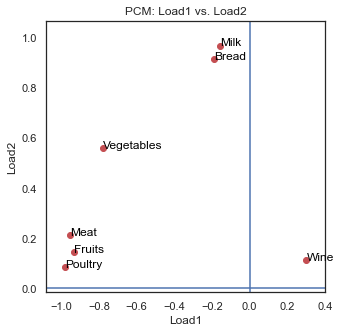

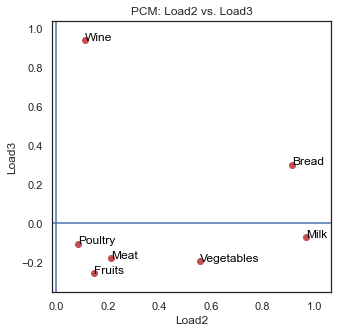

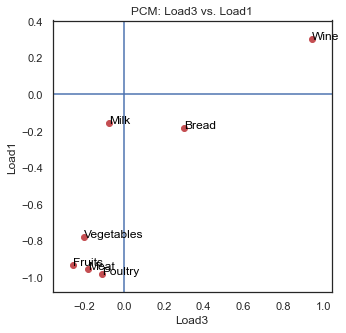

In [24]:
graph_factors(pcm_df, x_label='Load1', y_label="Load2", method="PCM")
graph_factors(pcm_df, x_label='Load2', y_label="Load3", method="PCM")
graph_factors(pcm_df, x_label='Load3', y_label="Load1", method="PCM")

#### PFM after varimax rotation

In [29]:
data = pd.read_csv("food.dat", sep = "\s+")
X = data.iloc[:, 1:]
R = X.corr()

f = np.linalg.inv(dat)
psiini = np.diag(1/np.diagonal(f))
psi = psiini.copy()

for i in range(1, 11):
    ee = np.linalg.eig(dat - psi)
    eigval = ee[0][:3]
    eigvec = ee[1][:,:3].T
    EE = np.tile(np.array(eigval), (len(dat), 1))
    QQ = np.sqrt(EE) * eigvec.T
    psiold = psi.copy()
    psi = np.diag(1 - sum((QQ * QQ).T))
    i += 1
    z = psi - psiold
    convergence = np.diagonal(z)

load = varimax(QQ)
ld = pd.DataFrame({"0": -load[:,0], "1": load[:,1], "2": load[:,2]})
com = np.diag(np.dot(ld, ld.T))
psi = np.diag(dat) - com


loads_ = [-load[:,0], load[:,1], load[:,2]]
pfm_df = build_table_df(data, loads_, com, psi, name='pfm')
pfm_df

,Load1,Load2,Load3,Comunalidades,Varianzas especificas,Variables
0,-0.1790,0.9100,0.3043,0.9528,0.0472,Bread
1,-0.7784,0.5534,-0.1971,0.9510,0.0490,Vegetables
2,-0.9177,0.1478,-0.2463,0.9246,0.0754,Fruits
3,-0.9648,0.2085,-0.1472,0.9961,0.0039,Meat
4,-0.9891,0.0812,-0.0538,0.9877,0.0123,Poultry
5,-0.1641,0.9435,-0.1052,0.9282,0.0718,Milk
6,0.3668,0.1530,0.7684,0.7483,0.2517,Wine


In [31]:
print(np.sum(pfm_df['Comunalidades']) / pfm_df.shape[0])
print(ee)

0.9269571428571428
(array([ 4.28610941,  1.7358024 ,  0.46673188, -0.04595623,  0.04727665,
       -0.01433892,  0.01690589]), array([[ 0.24059684,  0.63506521,  0.09904846,  0.52641492, -0.46851146,
         0.17042901, -0.05773252],
       [ 0.46566733,  0.09753659, -0.10407594, -0.40595604, -0.08184881,
         0.30732596,  0.70488295],
       [ 0.44321975, -0.21471385,  0.07459398,  0.60582347,  0.58643242,
        -0.06294136,  0.19236236],
       [ 0.46687375, -0.15700979,  0.20185573, -0.23850286,  0.06866026,
         0.52560217, -0.61544748],
       [ 0.44143203, -0.21649566,  0.39047619, -0.13911071, -0.3777586 ,
        -0.66505329, -0.03803302],
       [ 0.27952563,  0.53420241, -0.45810442, -0.26573389,  0.36231094,
        -0.39232545, -0.26614014],
       [-0.19456473,  0.42916442,  0.75545767, -0.21027374,  0.38885704,
        -0.00838538,  0.10840213]]))


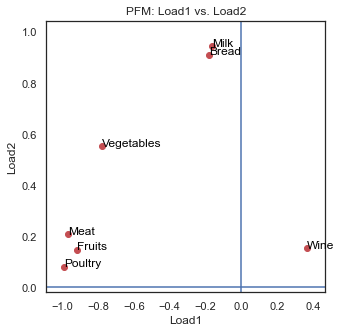

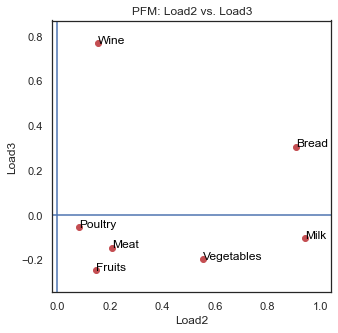

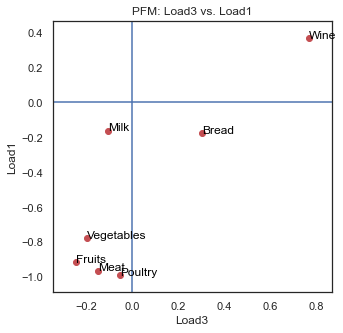

In [26]:
graph_factors(pfm_df, x_label='Load1', y_label="Load2", method="PFM")
graph_factors(pfm_df, x_label='Load2', y_label="Load3", method="PFM")
graph_factors(pfm_df, x_label='Load3', y_label="Load1", method="PFM")

### Referencias

- https://github.com/QuantLet/MVA/tree/master/QID-1211-MVAfacthous